<>:38: SyntaxWarning: invalid escape sequence '\G'
<>:38: SyntaxWarning: invalid escape sequence '\G'
<>:38: SyntaxWarning: invalid escape sequence '\G'
<>:38: SyntaxWarning: invalid escape sequence '\G'
C:\Users\rupes\AppData\Local\Temp\ipykernel_4836\3752057803.py:38: SyntaxWarning: invalid escape sequence '\G'
  ['$\Gamma$', 'M', 'K', '$\Gamma$', 'A', 'L', 'H', 'A'])
C:\Users\rupes\AppData\Local\Temp\ipykernel_4836\3752057803.py:38: SyntaxWarning: invalid escape sequence '\G'
  ['$\Gamma$', 'M', 'K', '$\Gamma$', 'A', 'L', 'H', 'A'])


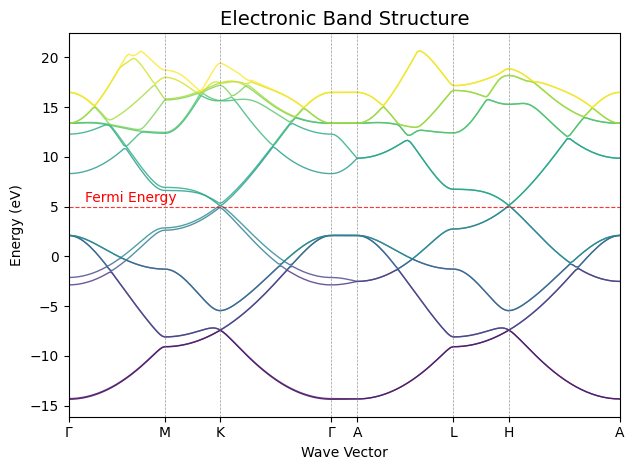

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = np.loadtxt('gp_bands.dat.gnu')

# Extract k-points and reshape band energies
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

# Define high-symmetry points
gG1 = k[0]
M = k[40]
K = k[80]
gG2 = k[120]
A = k[160]
L = k[200]
H = k[240]
A2 = k[280]  # Avoid reassigning A

# Plot the band structure
colors = plt.cm.viridis(np.linspace(0, 1, len(bands)))  # Use colormap for unique colors
for band, color in zip(range(len(bands)), colors):
    plt.plot(k, bands[band, :], linewidth=1, alpha=0.8, color=color)

# Highlight the Fermi energy
fermi_energy = 4.9682
plt.axhline(fermi_energy, linestyle='--', linewidth=0.8, color='red', alpha=0.8)
plt.text(min(k) + 0.1, fermi_energy + 0.5, 'Fermi Energy', color='red', fontsize=10)

# Add dotted vertical lines at high-symmetry points
high_symmetry_points = [M, K, gG2, A, L, H, A2]
for point in high_symmetry_points:
    plt.axvline(point, linestyle='--', color='gray', linewidth=0.5, alpha=0.8)

# Add labels for high-symmetry points
plt.xticks([gG1, M, K, gG2, A, L, H, A2], 
           ['$\Gamma$', 'M', 'K', '$\Gamma$', 'A', 'L', 'H', 'A'])

# Customize plot appearance
plt.xlabel("Wave Vector")
plt.ylabel("Energy (eV)")
plt.title("Electronic Band Structure", fontsize=14)
plt.grid(False)
plt.tight_layout()

# Adjust x-axis range to start and end at Γ and A
plt.xlim(gG1, A2)

# Save the plot as a high-resolution PNG and PDF
plt.savefig('plot-bands.png', dpi=2400, format='png')  # Save as PNG with very high resolution
plt.savefig('plot-bands.pdf', format='pdf')  # Save as a PDF

# Show the plot
plt.show()


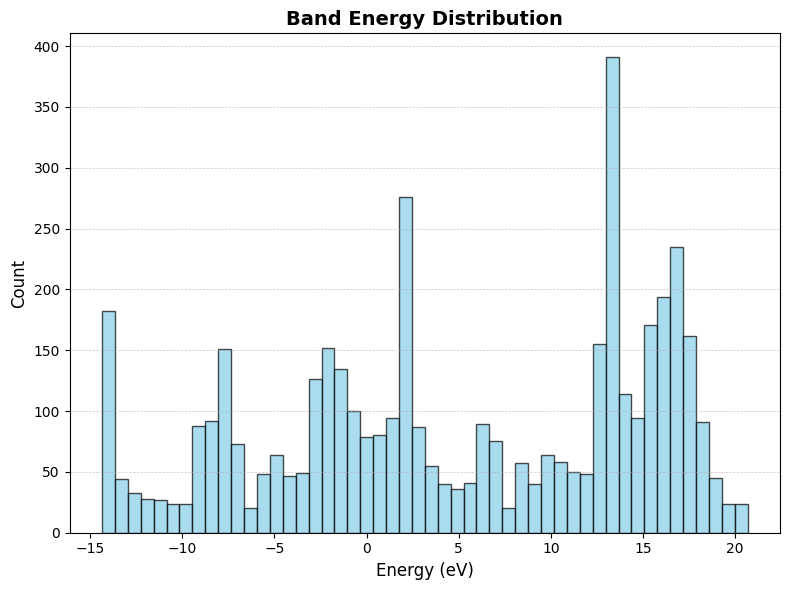

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = np.loadtxt('gp_bands.dat.gnu')

# Extract band energies from the dataset
band_energies = data[:, 1]  # Column with energy values

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(band_energies, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels, title, and grid
plt.xlabel("Energy (eV)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Band Energy Distribution", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Save and display the plot
plt.tight_layout()
plt.savefig('band_energy_distribution.png', dpi=300)
plt.show()


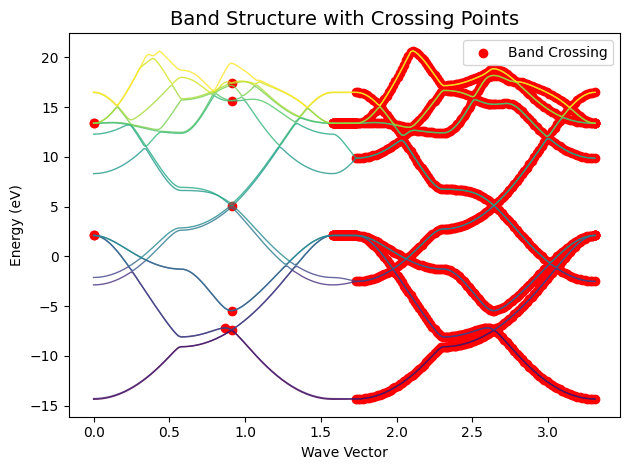

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('gp_bands.dat.gnu')

# Extract k-points and reshape band energies
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

# Tolerance for detecting crossings
tolerance = 1e-3

# Find band crossing points
crossing_points = []  # To store (k-point, energy) of crossings
for i in range(len(k)):  # Loop through k-points
    for j in range(len(bands)):  # Loop through band pairs
        for m in range(j + 1, len(bands)):
            if abs(bands[j, i] - bands[m, i]) < tolerance:  # Check energy difference
                crossing_points.append((k[i], bands[j, i]))

# Plot the band structure
colors = plt.cm.viridis(np.linspace(0, 1, len(bands)))
for band, color in zip(range(len(bands)), colors):
    plt.plot(k, bands[band, :], linewidth=1, alpha=0.8, color=color)

# Highlight band crossing points
crossing_points = np.array(crossing_points)
if len(crossing_points) > 0:
    plt.scatter(crossing_points[:, 0], crossing_points[:, 1], color='red', marker='o', label='Band Crossing')

# Customize plot appearance
plt.xlabel("Wave Vector")
plt.ylabel("Energy (eV)")
plt.title("Band Structure with Crossing Points", fontsize=14)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig('band_crossings.png', dpi=300)

# Show the plot
plt.show()

# Print crossing points
#print("Band Crossing Points (k-point, energy):")
#for point in crossing_points:
 #   print(f"k = {point[0]:.4f}, Energy = {point[1]:.4f} eV")


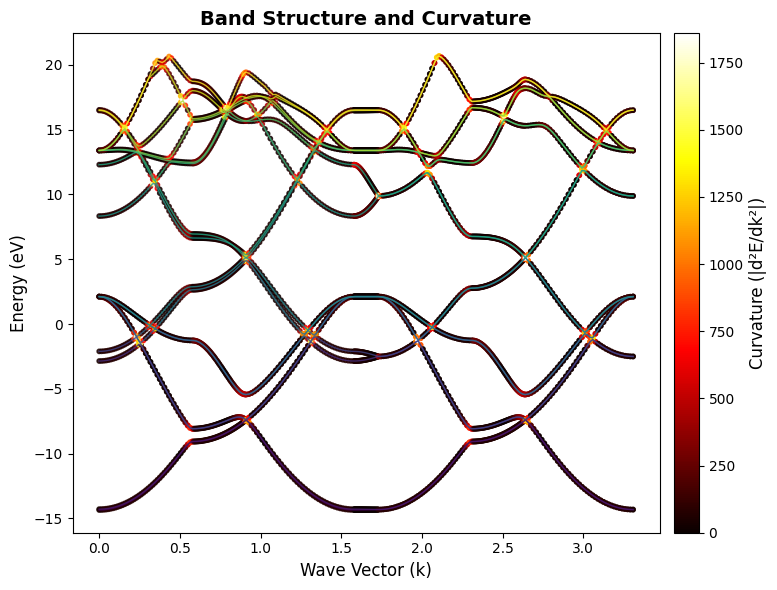

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the band structure file
data = np.loadtxt('gp_bands.dat.gnu')

# Extract k-points and reshape band energies
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

# Calculate the second derivative (curvature) of each band
curvatures = []
for band in bands:
    # Use NumPy's gradient twice to calculate second derivative
    first_derivative = np.gradient(band, k)
    second_derivative = np.gradient(first_derivative, k)
    curvatures.append(second_derivative)

curvatures = np.array(curvatures)

# Plot band structure with curvature overlay
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bands
colors = plt.cm.viridis(np.linspace(0, 1, len(bands)))  # Color map for bands
for band, color in zip(bands, colors):
    ax.plot(k, band, linewidth=1, color=color, alpha=0.8)

# Plot curvature as a heat map
# The intensity of the heat map corresponds to curvature (absolute value)
curvature_intensity = np.abs(curvatures)
curvature_max = np.max(curvature_intensity)
for i, (band, curvature) in enumerate(zip(bands, curvature_intensity)):
    ax.scatter(k, band, c=curvature, cmap="hot", s=10, alpha=0.8, label=f"Band {i+1}" if i == 0 else None)

# Add labels and title
ax.set_xlabel("Wave Vector (k)", fontsize=12)
ax.set_ylabel("Energy (eV)", fontsize=12)
ax.set_title("Band Structure and Curvature", fontsize=14, fontweight='bold')
ax.grid(False)

# Add a color bar to show curvature intensity
sm = plt.cm.ScalarMappable(cmap="hot", norm=plt.Normalize(0, curvature_max))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label("Curvature (|d²E/dk²|)", fontsize=12)

# Save the plot as high-resolution image
plt.tight_layout()
plt.savefig('band_flatness_curvature.png', dpi=300)

# Show the plot
plt.show()


<>:35: SyntaxWarning: invalid escape sequence '\G'
<>:35: SyntaxWarning: invalid escape sequence '\G'
<>:35: SyntaxWarning: invalid escape sequence '\G'
<>:35: SyntaxWarning: invalid escape sequence '\G'
C:\Users\rupes\AppData\Local\Temp\ipykernel_4836\3852015251.py:35: SyntaxWarning: invalid escape sequence '\G'
  ['$\Gamma$', 'M', 'K', '$\Gamma$', 'A', 'L', 'H', 'A'])
C:\Users\rupes\AppData\Local\Temp\ipykernel_4836\3852015251.py:35: SyntaxWarning: invalid escape sequence '\G'
  ['$\Gamma$', 'M', 'K', '$\Gamma$', 'A', 'L', 'H', 'A'])


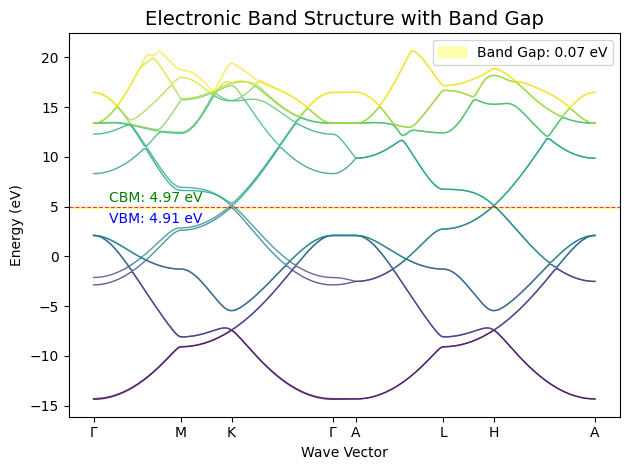

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('gp_bands.dat.gnu')

# Extract k-points and reshape band energies
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

# Find VBM (highest occupied level) and CBM (lowest unoccupied level)
vbm = np.max(bands[bands < 4.9682])  # Below Fermi energy
cbm = np.min(bands[bands > 4.9682])  # Above Fermi energy
band_gap = cbm - vbm

# Plot the band structure
colors = plt.cm.viridis(np.linspace(0, 1, len(bands)))  # Use colormap for distinct band colors
for band, color in zip(range(len(bands)), colors):
    plt.plot(k, bands[band, :], linewidth=1, alpha=0.8, color=color)

# Highlight the Fermi energy
fermi_energy = 4.9682
plt.axhline(fermi_energy, linestyle='--', linewidth=0.8, color='red', alpha=0.8) #label='Fermi Energy')

# Shade the band gap region
plt.axhspan(vbm, cbm, color='yellow', alpha=0.3, label=f'Band Gap: {band_gap:.2f} eV')

# Annotate VBM and CBM
plt.text(min(k) + 0.1, vbm - 1.5, f'VBM: {vbm:.2f} eV', color='blue', fontsize=10)
plt.text(min(k) + 0.1, cbm + 0.5, f'CBM: {cbm:.2f} eV', color='green', fontsize=10)

# Add high-symmetry points
gG1, M, K, gG2, A, L, H, A2 = k[0], k[40], k[80], k[120], k[160], k[200], k[240], k[280]
plt.xticks([gG1, M, K, gG2, A, L, H, A2], 
           ['$\Gamma$', 'M', 'K', '$\Gamma$', 'A', 'L', 'H', 'A'])

# Customize plot appearance
plt.xlabel("Wave Vector")
plt.ylabel("Energy (eV)")
plt.title("Electronic Band Structure with Band Gap", fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()

# Save the plot before displaying it
plt.savefig('band_gap_visualization.png', dpi=300)  # Save as PNG with high resolution

# Show the plot
plt.show()
